# Plots of Anti-Symmetric tensor

In [1]:
# load modules 
import numpy as np
import xarray as xr
from xmitgcm import open_mdsdataset
from matplotlib import pyplot as plt
from matplotlib import colors, ticker, cm
from matplotlib.colors import LogNorm
%matplotlib inline
import os 
from xgcm import Grid, generate_grid_ds

In [2]:
Lcoarse = 50e3

In [3]:
Model_Tav = xr.open_dataset('./outputs_ncfiles/Model_Tav.nc')
Trac_Tav = xr.open_dataset('./outputs_ncfiles/Trac_Tav.nc')

In [4]:
Model_Tav.Ttave

<xarray.DataArray 'Ttave' (Z: 40, YC: 400, XC: 400)>
[6400000 values with dtype=float32]
Coordinates:
  * XC       (XC) float32 2500.0 7500.0 12500.0 ... 1992500.0 1997500.0
  * YC       (YC) float32 2500.0 7500.0 12500.0 ... 1992500.0 1997500.0
  * Z        (Z) float32 -5.0 -15.0 -25.0 -36.0 ... -2727.5 -2830.5 -2933.5
    rA       (YC, XC) float32 ...
    Depth    (YC, XC) float32 ...
    drF      (Z) float32 ...
    PHrefC   (Z) float32 ...
    hFacC    (Z, YC, XC) float32 ...

In [7]:
diff_tensor = xr.open_dataset('./outputs_ncfiles/diff_tensor_with_diff_'+str(int(Lcoarse//1e3))+'km.nc')
Trac_coarse = xr.open_dataset('./outputs_ncfiles/Trac_coarse_'+str(int(Lcoarse//1e3))+'km.nc')
Vels_coarse = xr.open_dataset('./outputs_ncfiles/Vels_coarse_'+str(int(Lcoarse//1e3))+'km')
T_coarse    = xr.open_dataset('./outputs_ncfiles/T_coarse_'+str(int(Lcoarse//1e3))+'km')

In [8]:
list_trac = ['TRAC01', 'TRAC02', 'TRAC03', 'TRAC04', 'TRAC05', 
            'TRAC06', 'TRAC07', 'TRAC08', 'TRAC09', 'TRAC10', 
            'TRAC11', 'TRAC12', 'TRAC13', 'TRAC14', 'TRAC15', 
            'TRAC16', 'TRAC17', 'TRAC18', 'TRAC19', 'TRAC20']

In [9]:
Xcoarse = T_coarse.XCcoarse.data
Ycoarse = T_coarse.YCcoarse.data
Z = T_coarse.Z.data

Ypcol = np.append(Ycoarse, Ycoarse[-1]+Lcoarse)-Lcoarse/2
Xpcol = np.append(Xcoarse, Xcoarse[-1]+Lcoarse)-Lcoarse/2
Zpcol = np.append(Z, Z[-1])

In [10]:
Xcoarse = T_coarse.XCcoarse.data
Ycoarse = T_coarse.YCcoarse.data
Z = T_coarse.Z.data

In [11]:
params = {
   'axes.labelsize': 12,
   'font.size': 12,
   'legend.fontsize': 12,
   'xtick.labelsize': 12,
   'ytick.labelsize': 12,
   'text.usetex': False,
   'figure.figsize': [4.5, 4.5]
   }
plt.rcParams.update(params)

In [12]:
grid_ds = xr.Dataset()
grid_ds['TRAC01'] = Trac_coarse['TRAC01']
grid_ds['wVeltave'] = Model_Tav['wVeltave']
grid_ds = grid_ds.drop(['wVeltave','XC','YC']).isel(XC=0, YC=0)

In [13]:
psi1 = diff_tensor.AT.where(T_coarse.hFacCcoarse==1.).isel(i=1, j=2).rename('psi1')
psi2 = -diff_tensor.AT.where(T_coarse.hFacCcoarse==1.).isel(i=0, j=2).rename('psi2')
psi3 = diff_tensor.AT.where(T_coarse.hFacCcoarse==1.).isel(i=0, j=1).rename('psi3')

## GM like 

In [14]:
T_coarse

<xarray.Dataset>
Dimensions:      (XCcoarse: 40, YCcoarse: 40, Z: 40)
Coordinates:
  * Z            (Z) float32 -5.0 -15.0 -25.0 -36.0 ... -2727.5 -2830.5 -2933.5
  * YCcoarse     (YCcoarse) float32 25000.0 75000.0 ... 1925000.0 1975000.0
  * XCcoarse     (XCcoarse) float32 25000.0 75000.0 ... 1925000.0 1975000.0
    hFacCcoarse  (Z, YCcoarse, XCcoarse) float32 0.9 0.9 0.9 0.9 ... 1.0 1.0 1.0
    drF          (Z) float32 ...
    PHrefC       (Z) float32 ...
Data variables:
    T            (Z, YCcoarse, XCcoarse) float32 ...
    T_Z          (Z, YCcoarse, XCcoarse) float32 ...
    T_Y          (Z, YCcoarse, XCcoarse) float32 ...
    T_X          (Z, YCcoarse, XCcoarse) float32 ...
    UT           (Z, YCcoarse, XCcoarse) float32 ...
    VT           (Z, YCcoarse, XCcoarse) float32 ...
    WT           (Z, YCcoarse, XCcoarse) float32 ...
    TT           (Z, YCcoarse, XCcoarse) float32 ...
    UpTp         (Z, YCcoarse, XCcoarse) float32 ...
    VpTp         (Z, YCcoarse, XCcoarse) floa

In [15]:
Sx = -T_coarse.T_X/T_coarse.T_Z
Sy = -T_coarse.T_Y/T_coarse.T_Z

In [16]:
Kgmy = -psi1/Sy
Kgmx = psi2/Sx

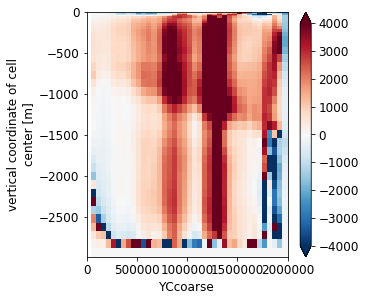

In [25]:
Kgmy.sel(XCcoarse=slice(1500e3, 2000e3)).mean('XCcoarse').plot(vmin=-4000)

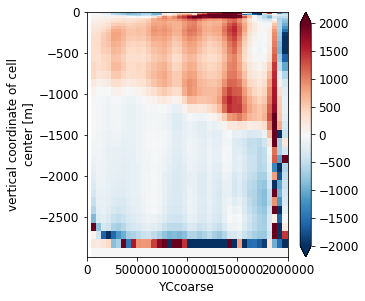

In [23]:
Kgmy.sel(XCcoarse=slice(0, 800e3)).mean('XCcoarse').plot(vmin=-2000)

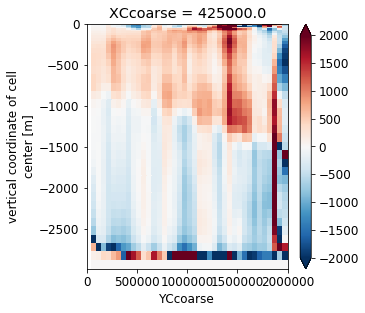

In [27]:
Kgmy.sel(XCcoarse=400e3, method='nearest').plot(vmin=-2000)

$$ \tilde{\mathbf{v}} = \nabla \times \psi$$

$$\tilde{\mathbf{v}} = \mathbf{i} (\psi_{3y} - \psi_{2z}) + \mathbf{j} (\psi_{1z} - \psi_{3x}) +\mathbf{k} (\psi_{2x} - \psi_{1y}) $$

In [31]:
# calculate gradients on coarse grid 
ds = generate_grid_ds(grid_ds, {'X': 'XCcoarse', 'Y':'YCcoarse'})
grid = Grid(ds, periodic='X')

psi1_Y = grid.interp(grid.diff(psi1, 'Y', boundary='extend')/ Lcoarse, 'Y', boundary='extend')
psi2_X = grid.interp(grid.diff(psi2, 'X')/ Lcoarse, 'X')

psi1_Z = -grid.interp(grid.diff(psi1, 'Z', boundary='extend'), 'Z', boundary='extend')/ grid_ds.drF
psi2_Z = -grid.interp(grid.diff(psi2, 'Z', boundary='extend'), 'Z', boundary='extend')/ grid_ds.drF

psi3_X = grid.interp(grid.diff(psi3, 'X')/ Lcoarse, 'X')
psi3_Y = grid.interp(grid.diff(psi3, 'Y', boundary='extend')/ Lcoarse, 'Y', boundary='extend')

In [32]:
Vstar1 = (psi3_Y - psi2_Z)
Vstar2 = (psi1_Z - psi3_X)
Vstar3 = (psi2_X - psi1_Y)

X-Y Plots

/home/dbalwada/.conda/envs/pangeo/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'rasterized'
  s)


Text(0, 0.5, '$u^* (m/s$)')

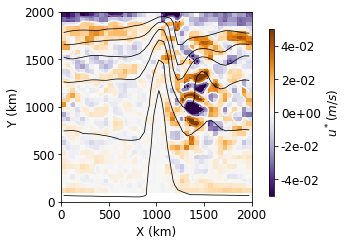

In [88]:
fig, ax = plt.subplots(1,1, figsize=(4,3.5))

im = ax.pcolormesh(Xpcol/1e3, Ypcol/1e3,Vstar1.where(T_coarse.hFacCcoarse==1.).sel(Z=-1000, method='nearest'), 
                vmin=-0.05, vmax=0.05, cmap='PuOr_r', rasterized=True)

ax.contour(Xcoarse/1e3, Ycoarse/1e3,Vstar1.where(T_coarse.hFacCcoarse==1.).sel(Z=-1000, method='nearest'), 
                vmin=-0.05, vmax=0.05, cmap='PuOr_r', rasterized=True)
#ax.pcolor(Xpcol/1e3, Ypcol/1e3, T_coarse.hFacCcoarse.where(Trac_coarse.YCcoarse>=1900e3).sel(Z=-1000, method='nearest'),
#              hatch='x', alpha=0)
ax.set_aspect('equal')
ax.set_xlabel('X (km)')
ax.set_ylabel('Y (km)')
step=3
startstep=0
ax.contour(Xcoarse/1e3, Ycoarse/1e3,  T_coarse['T'].sel(Z=-1000, method='nearest'), colors='k', linewidths=0.75)


fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.88, 0.15, 0.015, 0.66])
fig.colorbar(im, cax=cbar_ax,format='%.0e')
cbar_ax.set_ylabel('$u^* (m/s$)')
#plt.savefig('fig8a.pdf', dpi=200,bbox_inches='tight')

/home/dbalwada/.conda/envs/pangeo/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'rasterized'
  s)


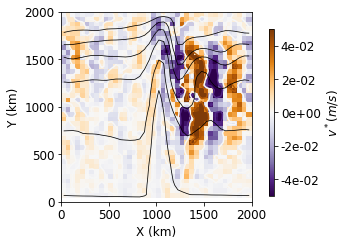

In [58]:
fig, ax = plt.subplots(1,1, figsize=(4,3.5))

im = ax.pcolormesh(Xpcol/1e3, Ypcol/1e3,Vstar2.where(T_coarse.hFacCcoarse==1.).sel(Z=-1000, method='nearest'), 
                vmin=-0.05, vmax=0.05, cmap='PuOr_r', rasterized=True)

ax.contour(Xcoarse/1e3, Ycoarse/1e3,Vstar2.where(T_coarse.hFacCcoarse==1.).sel(Z=-1000, method='nearest'), 
                vmin=-0.05, vmax=0.05, cmap='PuOr_r', rasterized=True)
#ax.pcolor(Xpcol/1e3, Ypcol/1e3, T_coarse.hFacCcoarse.where(Trac_coarse.YCcoarse>=1900e3).sel(Z=-1000, method='nearest'),
#              hatch='x', alpha=0)
ax.set_aspect('equal')
ax.set_xlabel('X (km)')
ax.set_ylabel('Y (km)')
step=3
startstep=0


ax.contour(Xcoarse/1e3, Ycoarse/1e3,  T_coarse['T'].sel(Z=-1000, method='nearest'), colors='k', linewidths=0.75)


fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.88, 0.15, 0.015, 0.66])
fig.colorbar(im, cax=cbar_ax,format='%.0e')
cbar_ax.set_ylabel('$v^* (m/s$)')
plt.savefig('fig8b.pdf', dpi=200,bbox_inches='tight')

/home/dbalwada/.conda/envs/pangeo/lib/python3.6/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/dbalwada/.conda/envs/pangeo/lib/python3.6/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/dbalwada/.conda/envs/pangeo/lib/python3.6/site-packages/matplotlib/figure.py:2362: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


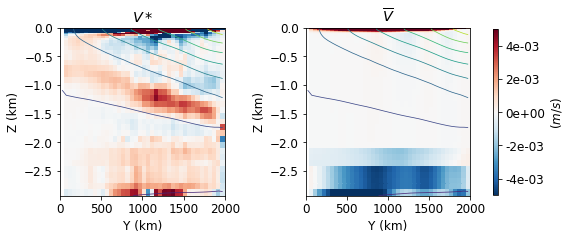

In [121]:
fig, ax = plt.subplots(1,2, figsize=(7,3.5))

im=ax[0].pcolormesh(Xpcol/1e3, Z/1e3, Vstar2.where(T_coarse.hFacCcoarse==1.).mean('XCcoarse'),
                 vmin=-0.005, vmax=0.005,cmap='RdBu_r')
ax[0].contour(Xcoarse/1e3, Z/1e3, T_coarse['T'].mean('XCcoarse'),linewidths=0.75)
ax[0].set_title('$V*$')
ax[0].set_xlabel('Y (km)')
ax[0].set_ylabel('Z (km)')


ax[1].pcolormesh(Xpcol/1e3, Z/1e3, Vels_coarse.V.where(T_coarse.hFacCcoarse==1.).mean('XCcoarse'),
                 vmin=-0.005, vmax=0.005,cmap='RdBu_r')
ax[1].contour(Xcoarse/1e3, Z/1e3, T_coarse['T'].mean('XCcoarse'),linewidths=0.75)
ax[1].set_title('$\overline{V}$')
ax[1].set_xlabel('Y (km)')
ax[1].set_ylabel('Z (km)')

cbar_ax = fig.add_axes([0.99, 0.2, 0.01, 0.66])
fig.colorbar(im, cax=cbar_ax,format='%.0e')
cbar_ax.set_ylabel('$(m/s$)')

plt.tight_layout()
plt.savefig('fig_mervels.pdf', dpi=200,bbox_inches='tight')

/home/dbalwada/.conda/envs/pangeo/lib/python3.6/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


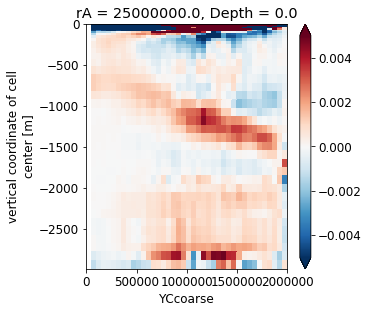

In [101]:
Vstar2.where(T_coarse.hFacCcoarse==1.).mean('XCcoarse').plot(vmin=-0.005)

/home/dbalwada/.conda/envs/pangeo/lib/python3.6/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


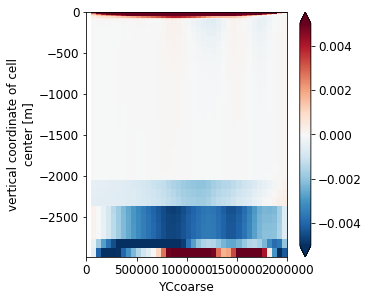

In [102]:
Vels_coarse.V.where(T_coarse.hFacCcoarse==1.).mean('XCcoarse').plot(vmin=-0.005)

/home/dbalwada/.conda/envs/pangeo/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'rasterized'
  s)


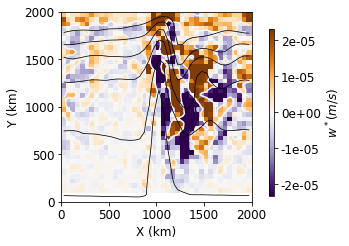

In [60]:
fig, ax = plt.subplots(1,1, figsize=(4,3.5))

im = ax.pcolormesh(Xpcol/1e3, Ypcol/1e3,Vstar3.where(T_coarse.hFacCcoarse==1.).sel(Z=-1000, method='nearest'), 
                vmin=-2/86400, vmax=2/86400, cmap='PuOr_r', rasterized=True)

ax.contour(Xcoarse/1e3, Ycoarse/1e3,Vstar3.where(T_coarse.hFacCcoarse==1.).sel(Z=-1000, method='nearest'), 
                vmin=-2/86400, vmax=2/86400, cmap='PuOr_r', rasterized=True)
#ax.pcolor(Xpcol/1e3, Ypcol/1e3, T_coarse.hFacCcoarse.where(Trac_coarse.YCcoarse>=1900e3).sel(Z=-1000, method='nearest'),
#              hatch='x', alpha=0)
ax.set_aspect('equal')
ax.set_xlabel('X (km)')
ax.set_ylabel('Y (km)')
step=3
startstep=0


ax.contour(Xcoarse/1e3, Ycoarse/1e3,  T_coarse['T'].sel(Z=-1000, method='nearest'), colors='k', linewidths=0.75)


fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.88, 0.15, 0.015, 0.66])
fig.colorbar(im, cax=cbar_ax,format='%.0e')
cbar_ax.set_ylabel('$w^* (m/s$)')
plt.savefig('fig8c.pdf', dpi=200,bbox_inches='tight')

In [122]:
gradT = xr.Dataset({'dCdx':T_coarse.T_X, 'dCdy':T_coarse.T_Y, 'dCdz':T_coarse.T_Z})

In [123]:
gradT

<xarray.Dataset>
Dimensions:      (XCcoarse: 40, YCcoarse: 40, Z: 40)
Coordinates:
  * Z            (Z) float32 -5.0 -15.0 -25.0 -36.0 ... -2727.5 -2830.5 -2933.5
  * YCcoarse     (YCcoarse) float32 25000.0 75000.0 ... 1925000.0 1975000.0
  * XCcoarse     (XCcoarse) float32 25000.0 75000.0 ... 1925000.0 1975000.0
    hFacCcoarse  (Z, YCcoarse, XCcoarse) float32 0.9 0.9 0.9 0.9 ... 1.0 1.0 1.0
    drF          (Z) float32 10.0 10.0 10.0 12.0 ... 103.0 103.0 103.0 103.0
    PHrefC       (Z) float32 49.05 147.15 245.25 ... 27767.205 28777.635
Data variables:
    dCdx         (Z, YCcoarse, XCcoarse) float32 ...
    dCdy         (Z, YCcoarse, XCcoarse) float32 ...
    dCdz         (Z, YCcoarse, XCcoarse) float32 ...

In [124]:
PEsink = -psi1*gradT.dCdy + psi2*gradT.dCdx

In [137]:
Kgm = -1/10*PEsink*gradT.dCdz/ (gradT.dCdx**2 + gradT.dCdy**2)

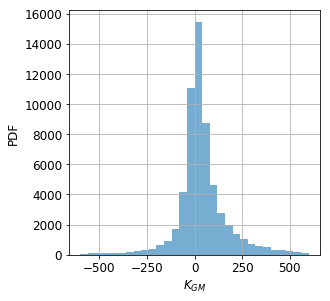

In [162]:
bins = np.linspace(-600,600,31)
Kgm.plot.hist(bins=bins, alpha=0.6)
plt.xlabel('$K_{GM}$')
plt.grid()
plt.title('')
plt.ylabel('PDF')
plt.savefig('fig_KGM.pdf', dpi=200,bbox_inches='tight')

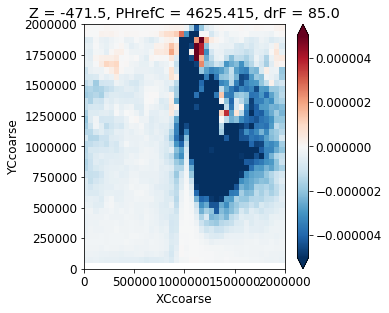

In [149]:
PEsink.sel(Z=-500, method='nearest').plot(vmin=-5e-6)

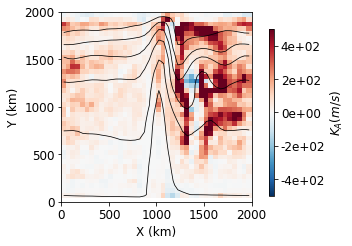

In [166]:
fig, ax = plt.subplots(1,1, figsize=(4,3.5))

im = ax.pcolormesh(Xpcol/1e3, Ypcol/1e3,Kgm.where(T_coarse.hFacCcoarse==1.).sel(Z=-1000, method='nearest'), 
                vmin=-500, vmax=500, cmap='RdBu_r', rasterized=True)


#ax.pcolor(Xpcol/1e3, Ypcol/1e3, T_coarse.hFacCcoarse.where(Trac_coarse.YCcoarse>=1900e3).sel(Z=-1000, method='nearest'),
#              hatch='x', alpha=0)
ax.set_aspect('equal')
ax.set_xlabel('X (km)')
ax.set_ylabel('Y (km)')
step=3
startstep=0


ax.contour(Xcoarse/1e3, Ycoarse/1e3,  T_coarse['T'].sel(Z=-1000, method='nearest'), colors='k', linewidths=0.75)


fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.88, 0.15, 0.015, 0.66])
fig.colorbar(im, cax=cbar_ax,format='%.0e')
cbar_ax.set_ylabel('$K_{A} (m/s$)')
plt.savefig('figKGM.pdf', dpi=200,bbox_inches='tight')

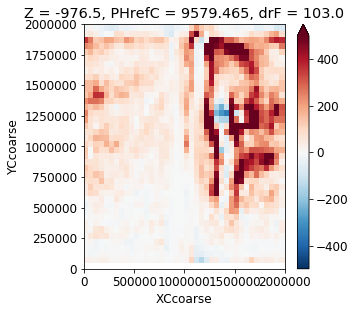

In [142]:
Kgm.sel(Z=-1000, method='nearest').plot(vmin=-500)

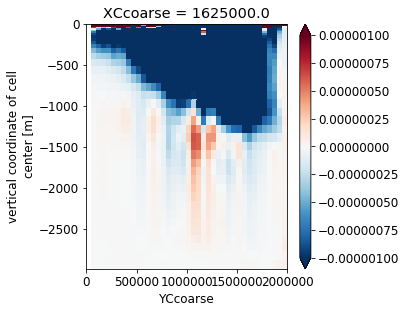

In [135]:
PEsink.sel(XCcoarse=1600e3, method='nearest').plot(vmin=-1e-6)

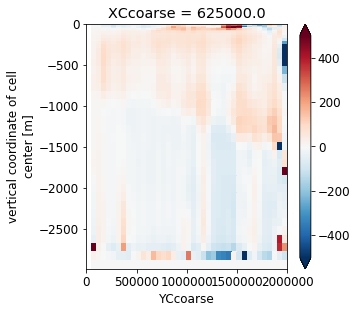

In [145]:
Kgm.sel(XCcoarse=600e3, method='nearest').plot(vmin=-500)

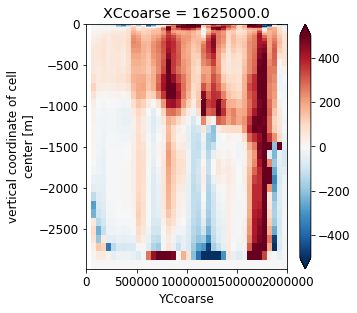

In [146]:
Kgm.sel(XCcoarse=1600e3, method='nearest').plot(vmin=-500)

/home/dbalwada/.conda/envs/pangeo/lib/python3.6/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


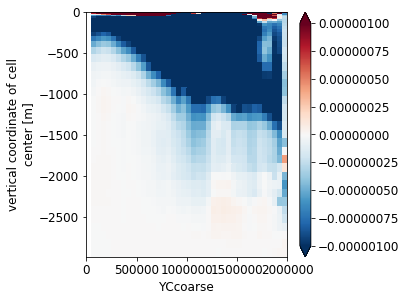

In [131]:
PEsink.mean('XCcoarse').plot(vmin=-1e-6)

/home/dbalwada/.conda/envs/pangeo/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'rasterized'
  s)


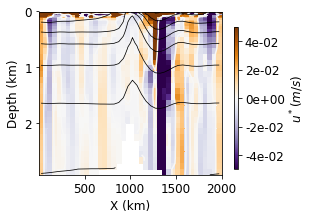

In [66]:
fig, ax = plt.subplots(1,1, figsize=(3.5,3.))

im = ax.pcolormesh(Xpcol/1e3, Zpcol, 
                   Vstar1.where(T_coarse.hFacCcoarse==1.)
                   .sel(YCcoarse=1000e3, method='nearest'), 
                vmin=-0.05, vmax=0.05, cmap='PuOr_r', rasterized=True)
ax.contour(Xcoarse/1e3, Z, 
                   Vstar1.where(T_coarse.hFacCcoarse==1.)
                   .sel(YCcoarse=1000e3, method='nearest'), 
                vmin=-0.05, vmax=0.05, cmap='PuOr_r', rasterized=True)

ax.set_xlabel('X (km)')
ax.set_ylabel('Depth (km)')
ax.set_xticks([500, 1000, 1500, 2000])
ax.set_yticks([-3000, -2000, -1000,0])
ax.set_yticklabels([3,2,1,0])

ax.contour(Xcoarse/1e3, Z,  T_coarse['T'].where(T_coarse.hFacCcoarse==1.).sel(YCcoarse=1000e3, method='nearest'), colors='k', linewidths=0.75)


fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.15, 0.015, 0.66])
fig.colorbar(im, cax=cbar_ax,format='%.0e')
cbar_ax.set_ylabel('$u^*(m/s$)')
plt.savefig('fig8d.pdf', dpi=200,bbox_inches='tight')

/home/dbalwada/.conda/envs/pangeo/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'rasterized'
  s)


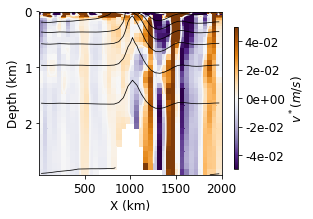

In [67]:
fig, ax = plt.subplots(1,1, figsize=(3.5,3.))

im = ax.pcolormesh(Xpcol/1e3, Zpcol, 
                   Vstar2.where(T_coarse.hFacCcoarse==1.)
                   .sel(YCcoarse=1000e3, method='nearest'), 
                vmin=-0.05, vmax=0.05, cmap='PuOr_r', rasterized=True)
ax.contour(Xcoarse/1e3, Z, 
                   Vstar2.where(T_coarse.hFacCcoarse==1.)
                   .sel(YCcoarse=1000e3, method='nearest'), 
                vmin=-0.05, vmax=0.05, cmap='PuOr_r', rasterized=True)

ax.set_xlabel('X (km)')
ax.set_ylabel('Depth (km)')
ax.set_xticks([500, 1000, 1500, 2000])
ax.set_yticks([-3000, -2000, -1000,0])
ax.set_yticklabels([3,2,1,0])

ax.contour(Xcoarse/1e3, Z,  T_coarse['T'].where(T_coarse.hFacCcoarse==1.).sel(YCcoarse=1000e3, method='nearest'), colors='k', linewidths=0.75)


fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.15, 0.015, 0.66])
fig.colorbar(im, cax=cbar_ax,format='%.0e')
cbar_ax.set_ylabel('$v^*(m/s$)')
plt.savefig('fig8e.pdf', dpi=200,bbox_inches='tight')

/home/dbalwada/.conda/envs/pangeo/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'rasterized'
  s)


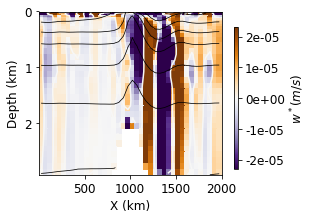

In [68]:
fig, ax = plt.subplots(1,1, figsize=(3.5,3.))

im = ax.pcolormesh(Xpcol/1e3, Zpcol, 
                   Vstar3.where(T_coarse.hFacCcoarse==1.)
                   .sel(YCcoarse=1000e3, method='nearest'), 
                vmin=-2/86400, vmax=2/86400, cmap='PuOr_r', rasterized=True)
ax.contour(Xcoarse/1e3, Z, 
                   Vstar3.where(T_coarse.hFacCcoarse==1.)
                   .sel(YCcoarse=1000e3, method='nearest'), 
                vmin=-2/86400, vmax=2/86400, cmap='PuOr_r', rasterized=True)

ax.set_xlabel('X (km)')
ax.set_ylabel('Depth (km)')
ax.set_xticks([500, 1000, 1500, 2000])
ax.set_yticks([-3000, -2000, -1000,0])
ax.set_yticklabels([3,2,1,0])

ax.contour(Xcoarse/1e3, Z,  T_coarse['T'].where(T_coarse.hFacCcoarse==1.).sel(YCcoarse=1000e3, method='nearest'), colors='k', linewidths=0.75)


fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.15, 0.015, 0.66])
fig.colorbar(im, cax=cbar_ax,format='%.0e')
cbar_ax.set_ylabel('$w^*(m/s$)')
plt.savefig('fig8f.pdf', dpi=200,bbox_inches='tight')

/home/dbalwada/.conda/envs/pangeo/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'rasterized'
  s)


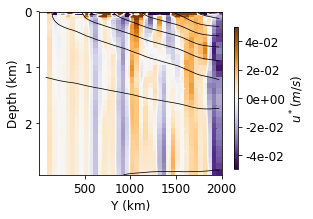

In [71]:
fig, ax = plt.subplots(1,1, figsize=(3.5,3.))

im = ax.pcolormesh(Ypcol/1e3, Zpcol, 
                   Vstar1.where(T_coarse.hFacCcoarse==1.)
                   .sel(XCcoarse=0, method='nearest'), 
                vmin=-0.05, vmax=0.05, cmap='PuOr_r', rasterized=True)
ax.contour(Ycoarse/1e3, Z, 
                   Vstar1.where(T_coarse.hFacCcoarse==1.)
                   .sel(XCcoarse=0, method='nearest'), 
                vmin=-0.05, vmax=0.05, cmap='PuOr_r', rasterized=True)

ax.set_xlabel('Y (km)')
ax.set_ylabel('Depth (km)')
ax.set_xticks([500, 1000, 1500, 2000])
ax.set_yticks([-3000, -2000, -1000,0])
ax.set_yticklabels([3,2,1,0])

ax.contour(Ycoarse/1e3, Z,  T_coarse['T'].where(T_coarse.hFacCcoarse==1.).sel(XCcoarse=0, method='nearest'), colors='k', linewidths=0.75)


fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.15, 0.015, 0.66])
fig.colorbar(im, cax=cbar_ax,format='%.0e')
cbar_ax.set_ylabel('$u^*(m/s$)')
plt.savefig('fig8g.pdf', dpi=200,bbox_inches='tight')

/home/dbalwada/.conda/envs/pangeo/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'rasterized'
  s)


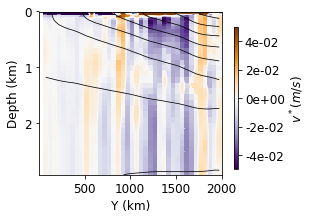

In [73]:
fig, ax = plt.subplots(1,1, figsize=(3.5,3.))

im = ax.pcolormesh(Ypcol/1e3, Zpcol, 
                   Vstar2.where(T_coarse.hFacCcoarse==1.)
                   .sel(XCcoarse=0, method='nearest'), 
                vmin=-0.05, vmax=0.05, cmap='PuOr_r', rasterized=True)
ax.contour(Ycoarse/1e3, Z, 
                   Vstar2.where(T_coarse.hFacCcoarse==1.)
                   .sel(XCcoarse=0, method='nearest'), 
                vmin=-0.05, vmax=0.05, cmap='PuOr_r', rasterized=True)

ax.set_xlabel('Y (km)')
ax.set_ylabel('Depth (km)')
ax.set_xticks([500, 1000, 1500, 2000])
ax.set_yticks([-3000, -2000, -1000,0])
ax.set_yticklabels([3,2,1,0])

ax.contour(Ycoarse/1e3, Z,  T_coarse['T'].where(T_coarse.hFacCcoarse==1.).sel(XCcoarse=0, method='nearest'), colors='k', linewidths=0.75)


fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.15, 0.015, 0.66])
fig.colorbar(im, cax=cbar_ax,format='%.0e')
cbar_ax.set_ylabel('$v^*(m/s$)')
plt.savefig('fig8h.pdf', dpi=200,bbox_inches='tight')

/home/dbalwada/.conda/envs/pangeo/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'rasterized'
  s)


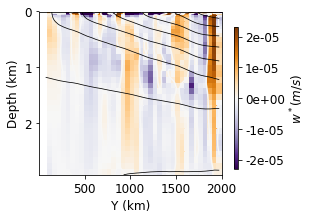

In [74]:
fig, ax = plt.subplots(1,1, figsize=(3.5,3.))

im = ax.pcolormesh(Ypcol/1e3, Zpcol, 
                   Vstar3.where(T_coarse.hFacCcoarse==1.)
                   .sel(XCcoarse=0, method='nearest'), 
                vmin=-2/86400, vmax=2/86400, cmap='PuOr_r', rasterized=True)
ax.contour(Ycoarse/1e3, Z, 
                   Vstar3.where(T_coarse.hFacCcoarse==1.)
                   .sel(XCcoarse=0, method='nearest'), 
                vmin=-2/86400, vmax=2/86400, cmap='PuOr_r', rasterized=True)

ax.set_xlabel('Y (km)')
ax.set_ylabel('Depth (km)')
ax.set_xticks([500, 1000, 1500, 2000])
ax.set_yticks([-3000, -2000, -1000,0])
ax.set_yticklabels([3,2,1,0])

ax.contour(Ycoarse/1e3, Z,  T_coarse['T'].where(T_coarse.hFacCcoarse==1.).sel(XCcoarse=0, method='nearest'), colors='k', linewidths=0.75)


fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.15, 0.015, 0.66])
fig.colorbar(im, cax=cbar_ax,format='%.0e')
cbar_ax.set_ylabel('$w^*(m/s$)')
plt.savefig('fig8i.pdf', dpi=200,bbox_inches='tight')

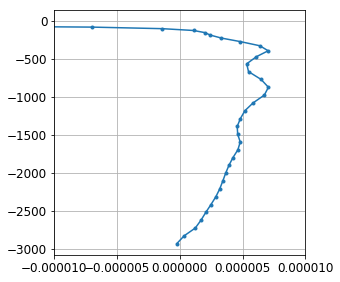

In [82]:
plt.plot(Vstar3.sel(XCcoarse=0, YCcoarse=1000e3, method='nearest'), Z, '.-')
plt.xlim([-1e-5, 1e-5])
plt.grid()

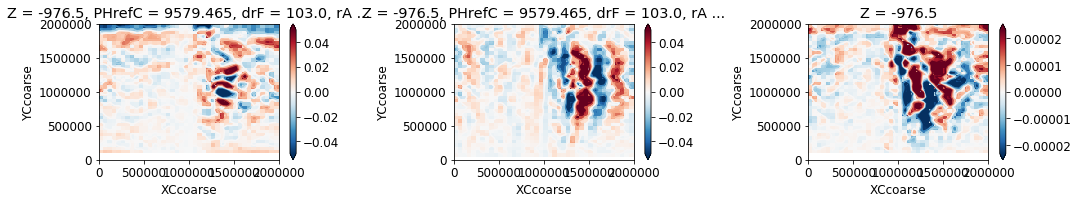

In [51]:
plt.figure(figsize=(15,3))

plt.subplot(131)
Vstar1.sel(Z=-1000, method='nearest').plot(vmin=-0.05)
Vstar1.sel(Z=-1000, method='nearest').plot.contour(vmin=-0.05)

plt.subplot(132)
Vstar2.sel(Z=-1000, method='nearest').plot(vmin=-0.05)
Vstar2.sel(Z=-1000, method='nearest').plot.contour(vmin=-0.05)

plt.subplot(133)
Vstar3.sel(Z=-1000, method='nearest').plot(vmin=-2/86400)
Vstar3.sel(Z=-1000, method='nearest').plot.contour(vmin=-2/86400)

plt.tight_layout()

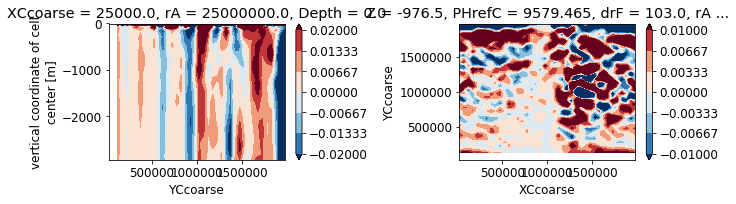

In [35]:
plt.figure(figsize=(10,3))
plt.subplot(121)
Vstar1.sel(XCcoarse=0, method='nearest').plot.contourf(vmin=-0.02)

plt.subplot(122)
Vstar1.sel(Z=-1000, method='nearest').plot.contourf(vmin=-0.01)

plt.tight_layout()

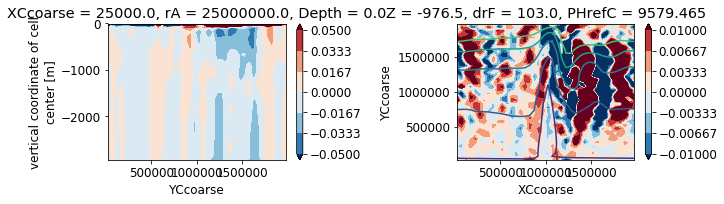

In [25]:
plt.figure(figsize=(10,3))
plt.subplot(121)
Vstar2.sel(XCcoarse=0, method='nearest').plot.contourf(vmin=-0.05)

plt.subplot(122)
Vstar2.sel(Z=-1000, method='nearest').plot.contourf(vmin=-0.01)
T_coarse['T'].sel(Z=-1000, method='nearest').plot.contour()

plt.tight_layout()

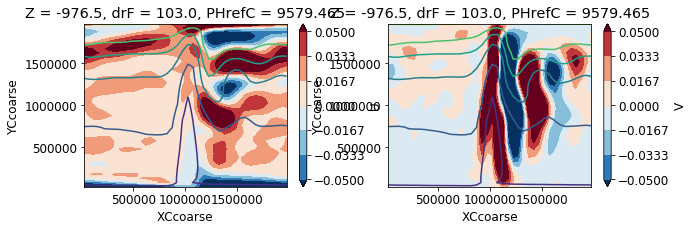

In [42]:
plt.figure(figsize=(10,3))

plt.subplot(121)
Vels_coarse.U.sel(Z=-1000, method='nearest').plot.contourf(vmin=-0.05)
T_coarse['T'].sel(Z=-1000, method='nearest').plot.contour()

plt.subplot(122)
Vels_coarse.V.sel(Z=-1000, method='nearest').plot.contourf(vmin=-0.05)
T_coarse['T'].sel(Z=-1000, method='nearest').plot.contour()

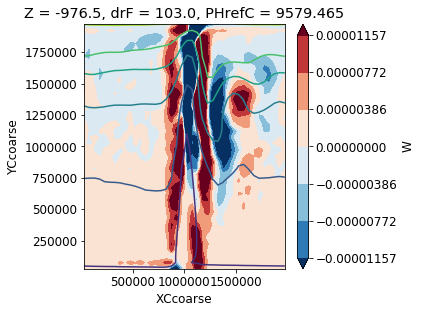

In [44]:
Vels_coarse.W.sel(Z=-1000, method='nearest').plot.contourf(vmin = -1/86400)
T_coarse['T'].sel(Z=-1000, method='nearest').plot.contour()

# Plots of D 

Y-Z Plots, with eigenvectors and isopycnals. 

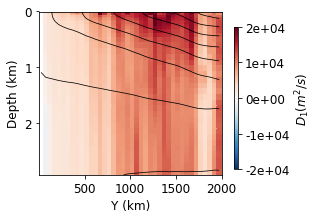

In [398]:
fig, ax = plt.subplots(1,1, figsize=(3.5,3.))

im = ax.pcolormesh(Ypcol/1e3, Zpcol, 
                   diff_tensor.eigvalsST.where(T_coarse.hFacCcoarse==1.)
                   .sel(XCcoarse=0, method='nearest').isel(ii=2), 
                vmin=-20e3, vmax=20e3, cmap='RdBu_r', rasterized=True)
ax.set_xlabel('Y (km)')
ax.set_ylabel('Depth (km)')
ax.set_xticks([500, 1000, 1500, 2000])
ax.set_yticks([-3000, -2000, -1000,0])
ax.set_yticklabels([3,2,1,0])

ax.contour(Ycoarse/1e3, Z,  T_coarse['T'].sel(XCcoarse=0, method='nearest'), colors='k', linewidths=0.75)


fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.15, 0.015, 0.66])
fig.colorbar(im, cax=cbar_ax,format='%.0e')
cbar_ax.set_ylabel('$D_1 (m^2/s$)')
plt.savefig('fig6d.pdf', dpi=200,bbox_inches='tight')

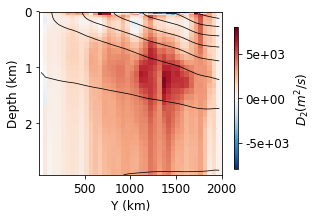

In [410]:
fig, ax = plt.subplots(1,1, figsize=(3.5,3.))

im = ax.pcolormesh(Ypcol/1e3, Zpcol, 
                   diff_tensor.eigvalsST.where(T_coarse.hFacCcoarse==1.)
                   .sel(XCcoarse=0, method='nearest').isel(ii=1), 
                vmin=-8e3, vmax=8e3, cmap='RdBu_r', rasterized=True)
ax.set_xlabel('Y (km)')
ax.set_ylabel('Depth (km)')
ax.set_xticks([500, 1000, 1500, 2000])
ax.set_yticks([-3000, -2000, -1000,0])
ax.set_yticklabels([3,2,1,0])

ax.contour(Ycoarse/1e3, Z,  T_coarse['T'].sel(XCcoarse=0, method='nearest'), colors='k', linewidths=0.75)


fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.15, 0.015, 0.66])
fig.colorbar(im, cax=cbar_ax,format='%.0e')
cbar_ax.set_ylabel('$D_2 (m^2/s$)')
plt.savefig('fig6e.pdf', dpi=200,bbox_inches='tight')

X-Y plots, with horizontal eigen vectors and mean flow contours. 

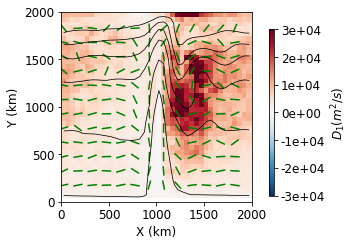

In [58]:
fig, ax = plt.subplots(1,1, figsize=(4,3.5))

im = ax.pcolormesh(Xpcol/1e3, Ypcol/1e3,diff_tensor.eigvalsST.where(T_coarse.hFacCcoarse==1.).sel(Z=-1000, method='nearest').isel(ii=2), 
                vmin=-30e3, vmax=30e3, cmap='RdBu_r', rasterized=True)
#ax.pcolor(Xpcol/1e3, Ypcol/1e3, T_coarse.hFacCcoarse.where(Trac_coarse.YCcoarse>=1900e3).sel(Z=-1000, method='nearest'),
#              hatch='x', alpha=0)
ax.set_aspect('equal')
ax.set_xlabel('X (km)')
ax.set_ylabel('Y (km)')
step=3
startstep=0

ax.quiver(Xcoarse[startstep:-1:step]/1e3, Ycoarse[startstep:-1:step]/1e3, 
          temp.where(T_coarse.hFacCcoarse==1.).isel(ii=2,k=0).sel(Z=-1000, method='nearest')[startstep:-1:step, startstep:-1:step], 
          temp.where(T_coarse.hFacCcoarse==1.).isel(ii=2,k=1).sel(Z=-1000, method='nearest')[startstep:-1:step, startstep:-1:step], 
          scale=20, pivot='mid',
           headlength=0, headaxislength=0, width=8e-3, color='g')

ax.contour(Xcoarse/1e3, Ycoarse/1e3,  T_coarse['T'].sel(Z=-1000, method='nearest'), colors='k', linewidths=0.75)


fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.88, 0.15, 0.015, 0.66])
fig.colorbar(im, cax=cbar_ax,format='%.0e')
cbar_ax.set_ylabel('$D_1 (m^2/s$)')
plt.savefig('fig6a.pdf', dpi=200,bbox_inches='tight')

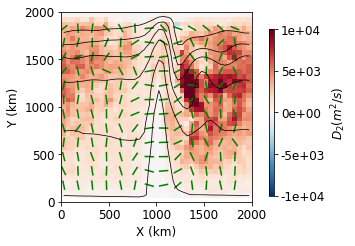

In [60]:
fig, ax = plt.subplots(1,1, figsize=(4,3.5))

im = ax.pcolormesh(Xpcol/1e3, Ypcol/1e3,diff_tensor.eigvalsST.where(T_coarse.hFacCcoarse==1.).sel(Z=-1000, method='nearest').isel(ii=1), 
                vmin=-10e3, vmax=10e3, cmap='RdBu_r', rasterized=True)
#ax.pcolor(Xpcol/1e3, Ypcol/1e3, T_coarse.hFacCcoarse.where(Trac_coarse.YCcoarse>=1900e3).sel(Z=-1000, method='nearest'),
#              hatch='x', alpha=0)
ax.set_aspect('equal')
ax.set_xlabel('X (km)')
ax.set_ylabel('Y (km)')
step=3
startstep=0
ax.quiver(Xcoarse[startstep:-1:step]/1e3, Ycoarse[startstep:-1:step]/1e3, 
          temp.where(T_coarse.hFacCcoarse==1.).isel(ii=1,k=0).sel(Z=-1000, method='nearest')[startstep:-1:step, startstep:-1:step], 
          temp.where(T_coarse.hFacCcoarse==1.).isel(ii=1,k=1).sel(Z=-1000, method='nearest')[startstep:-1:step, startstep:-1:step], 
          scale=20, pivot='mid',
           headlength=0, headaxislength=0, width=8e-3, color='g')

ax.contour(Xcoarse/1e3, Ycoarse/1e3,  T_coarse['T'].sel(Z=-1000, method='nearest'), colors='k', linewidths=0.75)


fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.88, 0.15, 0.015, 0.66])
fig.colorbar(im, cax=cbar_ax,format='%.0e')
cbar_ax.set_ylabel('$D_2 (m^2/s$)')
plt.savefig('fig6b.pdf', dpi=200,bbox_inches='tight')

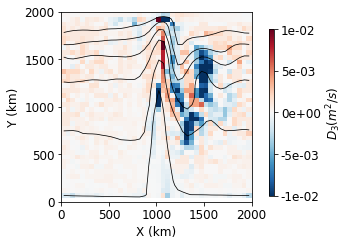

In [396]:
fig, ax = plt.subplots(1,1, figsize=(4,3.5))

im = ax.pcolormesh(Xpcol/1e3, Ypcol/1e3,diff_tensor.eigvalsST.where(T_coarse.hFacCcoarse==1.).sel(Z=-1000, method='nearest').isel(ii=0), 
                vmin=-1e-2, vmax=1e-2, cmap='RdBu_r', rasterized=True)
#ax.pcolor(Xpcol/1e3, Ypcol/1e3, T_coarse.hFacCcoarse.where(Trac_coarse.YCcoarse>=1900e3).sel(Z=-1000, method='nearest'),
#              hatch='x', alpha=0)
ax.set_aspect('equal')
ax.set_xlabel('X (km)')
ax.set_ylabel('Y (km)')


ax.contour(Xcoarse/1e3, Ycoarse/1e3,  T_coarse['T'].sel(Z=-1000, method='nearest'), colors='k', linewidths=0.75)


fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.88, 0.15, 0.015, 0.66])
fig.colorbar(im, cax=cbar_ax,format='%.0e')
cbar_ax.set_ylabel('$D_3 (m^2/s$)')
plt.savefig('fig6c.pdf', dpi=200,bbox_inches='tight')

X-Z plots

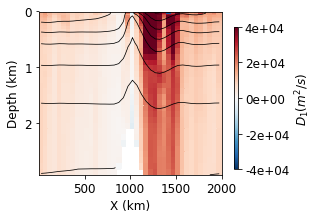

In [427]:
fig, ax = plt.subplots(1,1, figsize=(3.5,3.))

im = ax.pcolormesh(Xpcol/1e3, Zpcol, 
                   diff_tensor.eigvalsST.where(T_coarse.hFacCcoarse==1.)
                   .sel(YCcoarse=1000e3, method='nearest').isel(ii=2), 
                vmin=-40e3, vmax=40e3, cmap='RdBu_r', rasterized=True)
ax.set_xlabel('X (km)')
ax.set_ylabel('Depth (km)')
ax.set_xticks([500, 1000, 1500, 2000])
ax.set_yticks([-3000, -2000, -1000,0])
ax.set_yticklabels([3,2,1,0])

ax.contour(Xcoarse/1e3, Z,  T_coarse['T'].where(T_coarse.hFacCcoarse==1.).sel(YCcoarse=1000e3, method='nearest'), colors='k', linewidths=0.75)


fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.15, 0.015, 0.66])
fig.colorbar(im, cax=cbar_ax,format='%.0e')
cbar_ax.set_ylabel('$D_1 (m^2/s$)')
plt.savefig('fig6f.pdf', dpi=200,bbox_inches='tight')

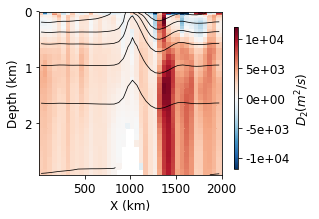

In [426]:
fig, ax = plt.subplots(1,1, figsize=(3.5,3.))

im = ax.pcolormesh(Xpcol/1e3, Zpcol, 
                   diff_tensor.eigvalsST.where(T_coarse.hFacCcoarse==1.)
                   .sel(YCcoarse=1000e3, method='nearest').isel(ii=1), 
                vmin=-12e3, vmax=12e3, cmap='RdBu_r', rasterized=True)
ax.set_xlabel('X (km)')
ax.set_ylabel('Depth (km)')
ax.set_xticks([500, 1000, 1500, 2000])
ax.set_yticks([-3000, -2000, -1000,0])
ax.set_yticklabels([3,2,1,0])

ax.contour(Xcoarse/1e3, Z,  T_coarse['T'].where(T_coarse.hFacCcoarse==1.).sel(YCcoarse=1000e3, method='nearest'), colors='k', linewidths=0.75)


fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.15, 0.015, 0.66])
fig.colorbar(im, cax=cbar_ax,format='%.0e')
cbar_ax.set_ylabel('$D_2 (m^2/s$)')
plt.savefig('fig6g.pdf', dpi=200,bbox_inches='tight')

# Angles and relative mags

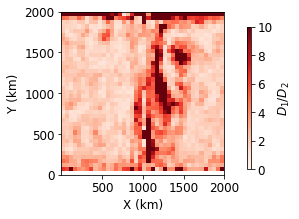

In [428]:
fig, ax = plt.subplots(1,1, figsize=(3.5,3.))

im = plt.pcolormesh(Xpcol/1e3, Ypcol/1e3, np.abs(diff_tensor.eigvalsST.isel(ii=2)/diff_tensor.eigvalsST.isel(ii=1)
                                       ).where(T_coarse.hFacCcoarse==1.).sel(Z=-1000, method='nearest'),
             vmin=0, vmax=10, cmap='Reds', rasterized=True)
ax.set_aspect('equal')
ax.set_xlabel('X (km)')
ax.set_ylabel('Y (km)')
ax.set_xticks([500, 1000, 1500, 2000])
ax.set_yticks([0, 500, 1000, 1500, 2000])


fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.15, 0.015, 0.66])
fig.colorbar(im, cax=cbar_ax)
cbar_ax.set_ylabel('$D_1/D_2$')
plt.savefig('fig6h.pdf', dpi=200,bbox_inches='tight')

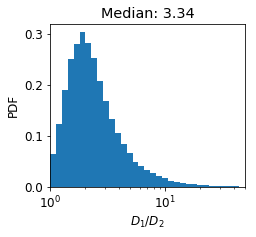

In [429]:
fig, ax = plt.subplots(1,1, figsize=(3.5,3.))

[_,_,_] = np.abs(diff_tensor.eigvalsST.isel(ii=2)/diff_tensor.eigvalsST.isel(ii=1)
                                       ).where(T_coarse.hFacCcoarse==1.).plot.hist(
    bins=np.logspace(0,2,40), density=True, rasterized=True)
plt.xscale('log')
plt.xlim([1, 50])
plt.xlabel('$D_1/D_2$')
plt.ylabel('PDF')
plt.title('Median: ' +str('%1.2f' %np.abs(diff_tensor.eigvalsST.isel(ii=2)/diff_tensor.eigvalsST.isel(ii=1)
                                       ).where(T_coarse.hFacCcoarse==1.).median(['XCcoarse', 'YCcoarse','Z']).values))


plt.savefig('fig6i.pdf', dpi=200,bbox_inches='tight')

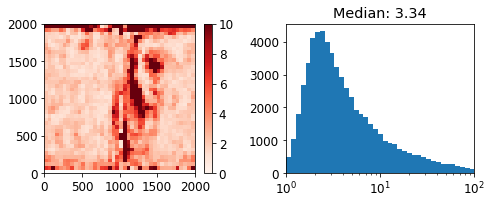

In [416]:
plt.figure(figsize=(7,3))
plt.subplot(121)
plt.pcolormesh(Xpcol/1e3, Ypcol/1e3, np.abs(diff_tensor.eigvalsST.isel(ii=2)/diff_tensor.eigvalsST.isel(ii=1)
                                       ).where(T_coarse.hFacCcoarse==1.).sel(Z=-1000, method='nearest'),
             vmin=0, vmax=10, cmap='Reds')
plt.colorbar()


plt.subplot(122)
[_,_,_] = np.abs(diff_tensor.eigvalsST.isel(ii=2)/diff_tensor.eigvalsST.isel(ii=1)
                                       ).where(T_coarse.hFacCcoarse==1.).plot.hist(bins=np.logspace(0,2,40))
plt.xscale('log')
plt.xlim([1, 100])
plt.title('Median: ' +str('%1.2f' %np.abs(diff_tensor.eigvalsST.isel(ii=2)/diff_tensor.eigvalsST.isel(ii=1)
                                       ).where(T_coarse.hFacCcoarse==1.).median(['XCcoarse', 'YCcoarse','Z']).values))

plt.tight_layout()


Text(0, 0.5, 'Y (km)')

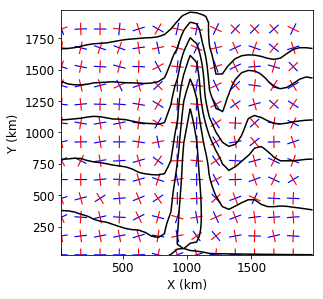

In [217]:
fig, ax = plt.subplots(1,1)
step=3
ax.quiver(Xcoarse[0:-1:step]/1e3, Ycoarse[0:-1:step]/1e3, temp.isel(ii=2,k=0).sel(Z=-1500, method='nearest')[0:-1:step, 0:-1:step], 
           (temp.isel(ii=2,k=1)).sel(Z=-1500, method='nearest')[0:-1:step, 0:-1:step], scale=20, pivot='mid',
           headlength=0, headaxislength=0,linewidths=40, color='b')
ax.quiver(Xcoarse[0:-1:step]/1e3, Ycoarse[0:-1:step]/1e3, temp.isel(ii=1,k=0).sel(Z=-1500, method='nearest')[0:-1:step, 0:-1:step], 
           (temp.isel(ii=1,k=1)).sel(Z=-1500, method='nearest')[0:-1:step, 0:-1:step], scale=20, pivot='mid',
            headlength=0, headaxislength=0,linewidths=40, color='r')

ax.contour(Xcoarse/1e3, Ycoarse/1e3,  T_coarse['T'].sel(Z=-1500, method='nearest'), colors='k')
plt.xlabel('X (km)')
plt.ylabel('Y (km)')

In [ ]:
fig, ax = plt.subplots(1,1)
step=3
ax.quiver(Xcoarse[0:-1:step]/1e3, Ycoarse[0:-1:step]/1e3, temp.isel(ii=2,k=0).sel(Z=-1500, method='nearest')[0:-1:step, 0:-1:step], 
           (temp.isel(ii=2,k=1)).sel(Z=-1500, method='nearest')[0:-1:step, 0:-1:step], scale=20, pivot='mid',
           headlength=0, headaxislength=0,linewidths=40, color='b')
ax.quiver(Xcoarse[0:-1:step]/1e3, Ycoarse[0:-1:step]/1e3, temp.isel(ii=1,k=0).sel(Z=-1500, method='nearest')[0:-1:step, 0:-1:step], 
           (temp.isel(ii=1,k=1)).sel(Z=-1500, method='nearest')[0:-1:step, 0:-1:step], scale=20, pivot='mid',
            headlength=0, headaxislength=0,linewidths=40, color='r')

ax.contour(Xcoarse/1e3, Ycoarse/1e3,  T_coarse['T'].sel(Z=-1500, method='nearest'), colors='k')
plt.xlabel('X (km)')
plt.ylabel('Y (km)')

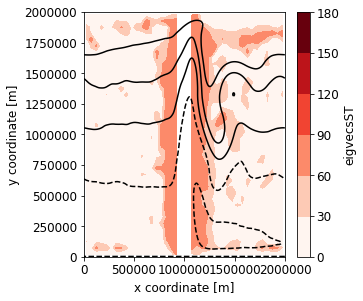

In [225]:
np.abs(A).sel(Z=-2500, method='nearest').plot.contourf(vmin=0, vmax=180, cmap='Reds')
Model_Tav.ETAtave.plot.contour(colors='k')

# define angles of isopycnals, and mean flow etc. 

What angles does the eigenvecs make with geodesic coordinates? 

What angles does the isopycnal coordinate make with geodesic coordinates?

# Angles for density coordinates 


\begin{equation}
tan(\beta) = \frac{(\rho_x^2 + \rho_y^2)^{1/2}}{\rho_z}
\end{equation}

\begin{equation}
tan(\alpha) = \frac{\rho_y}{\rho_x}
\end{equation}

A rotation by beta about y followed by alpha about z takes from isopycnal to geodesic coordinates. 

In [12]:
beta = 180/np.pi*np.arctan( (T_coarse['T_X']**2 + T_coarse['T_Y']**2)**0.5/T_coarse['T_Z']) 
alpha = 180/np.pi*np.arctan2( T_coarse['T_Y'] , T_coarse['T_X'] ) 

$\alpha$ of $\pm \pi$. Angle between steepest descent and x axis... so it is mostly close to 90. 

# Angles from the eigen vector

Since 2 discrete rotations are done, we can use a single eigen vector (the one corresponding to the smallest eigenvalue) to figure out the angles. 

So following the same path as done with density surfaces, where $\nabla \rho$ is the eigenvector pointing normal to isopycnal, we can do the calculation using $\mathbf{v}_{min} = (v_x, v_y, v_z)$

\begin{equation}
tan(\beta) = \frac{(v_x^2 + v_y^2)^{1/2}}{v_z}
\end{equation}

\begin{equation}
tan(\alpha) = \frac{v_y}{v_x}
\end{equation}


In [15]:
vx = diff_tensor.eigvecsST.isel(ii=0, k=0)
vy = diff_tensor.eigvecsST.isel(ii=0, k=1)
vz = diff_tensor.eigvecsST.isel(ii=0, k=2)

In [16]:
beta_diff = 180/np.pi*np.arctan( (vx**2 + vy**2)**0.5/vz) 
alpha_diff = 180/np.pi*np.arctan2( vy , vx ) 

# Compare 

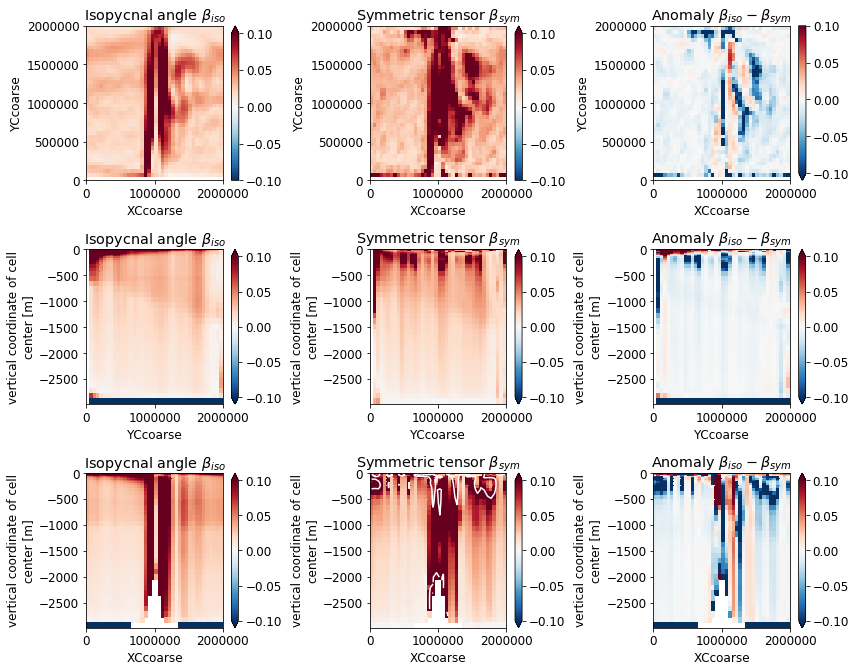

In [18]:
plt.figure(figsize=(12,9.5))

plt.subplot(331)
beta.where(T_coarse.hFacCcoarse==1.).sel(Z = -1000 , method='nearest').plot(vmin=-0.1)
plt.title(r'Isopycnal angle $\beta_{iso}$')

plt.subplot(332)
beta_diff.where(T_coarse.hFacCcoarse==1.).sel(Z = -1000 , method='nearest').plot(vmin=-0.1)
plt.title(r'Symmetric tensor $\beta_{sym}$')

plt.subplot(333)
(beta- beta_diff).where(T_coarse.hFacCcoarse==1.).sel(Z = -1000 , method='nearest').plot(vmin=-0.1)
plt.title(r'Anomaly $\beta_{iso} - \beta_{sym}$')


plt.subplot(334)
beta.where(T_coarse.hFacCcoarse==1.).sel(XCcoarse = 0 , method='nearest').plot(vmin=-0.1)
plt.title(r'Isopycnal angle $\beta_{iso}$')

plt.subplot(335)
beta_diff.where(T_coarse.hFacCcoarse==1.).sel(XCcoarse = 0 , method='nearest').plot(vmin=-0.1)
plt.title(r'Symmetric tensor $\beta_{sym}$')

plt.subplot(336)
(beta- beta_diff).where(T_coarse.hFacCcoarse==1.).sel(XCcoarse = 0 , method='nearest').plot(vmin=-0.1)
plt.title(r'Anomaly $\beta_{iso} - \beta_{sym}$')

plt.subplot(337)
beta.where(T_coarse.hFacCcoarse==1.).sel(YCcoarse = 1000e3 , method='nearest').plot(vmin=-0.1)
plt.title(r'Isopycnal angle $\beta_{iso}$')

plt.subplot(338)
beta_diff.where(T_coarse.hFacCcoarse==1.).sel(YCcoarse = 1000e3 , method='nearest').plot(vmin=-0.1)
diff_tensor.eigvalsST.where(T_coarse.hFacCcoarse==1.).sel(YCcoarse = 1000e3 , method='nearest').isel(ii=1).plot.contour(levels=[0], colors='w')
plt.title(r'Symmetric tensor $\beta_{sym}$')

plt.subplot(339)
(beta- beta_diff).where(T_coarse.hFacCcoarse==1.).sel(YCcoarse = 1000e3 , method='nearest').plot(vmin=-0.1)
plt.title(r'Anomaly $\beta_{iso} - \beta_{sym}$')

plt.tight_layout()
plt.savefig('beta.pdf')

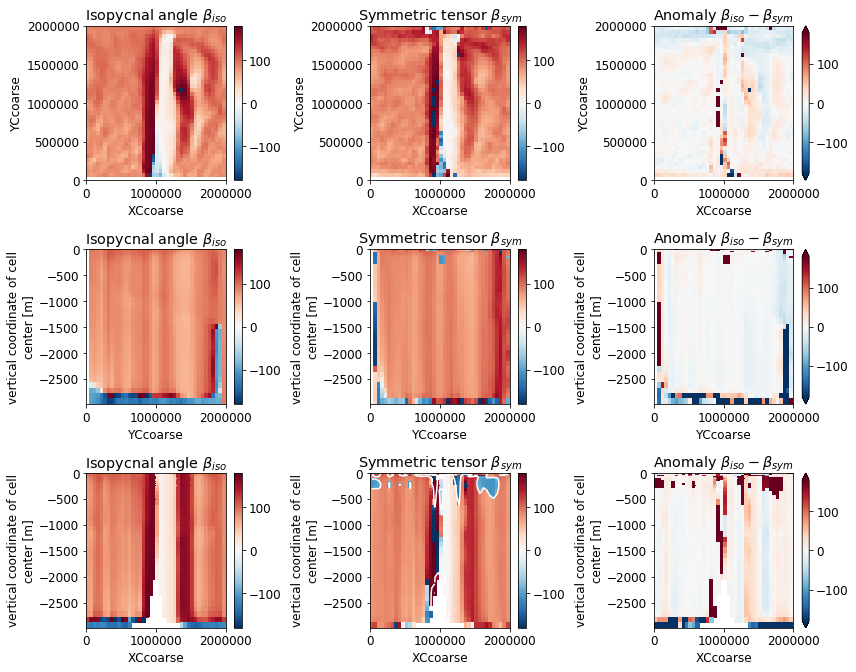

In [19]:
plt.figure(figsize=(12,9.5))

plt.subplot(331)
alpha.where(T_coarse.hFacCcoarse==1.).sel(Z = -1000 , method='nearest').plot(vmin=-180)
plt.title(r'Isopycnal angle $\beta_{iso}$')

plt.subplot(332)
alpha_diff.where(T_coarse.hFacCcoarse==1.).sel(Z = -1000 , method='nearest').plot(vmin=-180)
plt.title(r'Symmetric tensor $\beta_{sym}$')

plt.subplot(333)
(alpha - alpha_diff).where(T_coarse.hFacCcoarse==1.).sel(Z = -1000 , method='nearest').plot(vmin=-180)
plt.title(r'Anomaly $\beta_{iso} - \beta_{sym}$')


plt.subplot(334)
alpha.where(T_coarse.hFacCcoarse==1.).sel(XCcoarse = 0 , method='nearest').plot(vmin=-180)
plt.title(r'Isopycnal angle $\beta_{iso}$')

plt.subplot(335)
alpha_diff.where(T_coarse.hFacCcoarse==1.).sel(XCcoarse = 0 , method='nearest').plot(vmin=-180)
plt.title(r'Symmetric tensor $\beta_{sym}$')

plt.subplot(336)
(alpha- alpha_diff).where(T_coarse.hFacCcoarse==1.).sel(XCcoarse = 0 , method='nearest').plot(vmin=-180)
plt.title(r'Anomaly $\beta_{iso} - \beta_{sym}$')

plt.subplot(337)
alpha.where(T_coarse.hFacCcoarse==1.).sel(YCcoarse = 1000e3 , method='nearest').plot(vmin=-180)
plt.title(r'Isopycnal angle $\beta_{iso}$')

plt.subplot(338)
alpha_diff.where(T_coarse.hFacCcoarse==1.).sel(YCcoarse = 1000e3 , method='nearest').plot(vmin=-180)
diff_tensor.eigvalsST.where(T_coarse.hFacCcoarse==1.).sel(YCcoarse = 1000e3 , method='nearest').isel(ii=1).plot.contour(levels=[0], colors='w')
plt.title(r'Symmetric tensor $\beta_{sym}$')

plt.subplot(339)
(alpha- alpha_diff).where(T_coarse.hFacCcoarse==1.).sel(YCcoarse = 1000e3 , method='nearest').plot(vmin=-180)
plt.title(r'Anomaly $\beta_{iso} - \beta_{sym}$')

plt.tight_layout()
plt.savefig('alpha.pdf')

In [26]:
import cmocean.cm as cmo

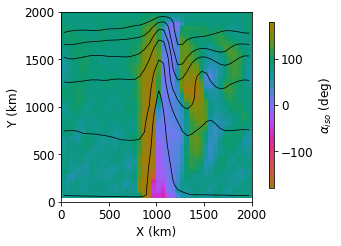

In [34]:
fig, ax = plt.subplots(1,1, figsize=(4,3.5))

im = ax.pcolormesh(Xpcol/1e3, Ypcol/1e3,alpha.where(T_coarse.hFacCcoarse==1.).sel(Z=-1000, method='nearest'), 
                vmin=-180, vmax=180, cmap=cmo.phase, rasterized=True)

ax.set_aspect('equal')
ax.set_xlabel('X (km)')
ax.set_ylabel('Y (km)')

ax.contour(Xcoarse/1e3, Ycoarse/1e3,  T_coarse['T'].sel(Z=-1000, method='nearest'), colors='k', linewidths=0.75)

fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.88, 0.18, 0.015, 0.66])
fig.colorbar(im, cax=cbar_ax)
cbar_ax.set_ylabel(r'$\alpha_{iso}$ (deg)')
plt.savefig('fig7a.pdf', dpi=200,bbox_inches='tight')

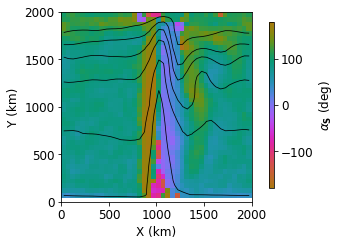

In [35]:
fig, ax = plt.subplots(1,1, figsize=(4,3.5))

im = ax.pcolormesh(Xpcol/1e3, Ypcol/1e3,alpha_diff.where(T_coarse.hFacCcoarse==1.).sel(Z=-1000, method='nearest'), 
                vmin=-180, vmax=180, cmap=cmo.phase, rasterized=True)

ax.set_aspect('equal')
ax.set_xlabel('X (km)')
ax.set_ylabel('Y (km)')

ax.contour(Xcoarse/1e3, Ycoarse/1e3,  T_coarse['T'].sel(Z=-1000, method='nearest'), colors='k', linewidths=0.75)

fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.88, 0.18, 0.015, 0.66])
fig.colorbar(im, cax=cbar_ax)
cbar_ax.set_ylabel(r'$\alpha_{\mathbf{S}}$ (deg)')
plt.savefig('fig7b.pdf', dpi=200,bbox_inches='tight')

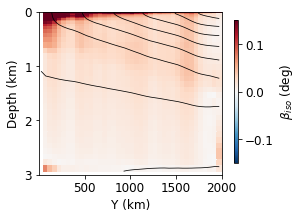

In [46]:
fig, ax = plt.subplots(1,1, figsize=(3.5,3))

im = ax.pcolormesh(Ypcol/1e3, Z,beta.where(T_coarse.hFacCcoarse==1.).sel(XCcoarse=0, method='nearest'), 
                vmin=-0.15, vmax=0.15, cmap='RdBu_r', rasterized=True)

ax.set_xlabel('Y (km)')
ax.set_ylabel('Depth (km)')

ax.contour(Ycoarse/1e3, Z,  T_coarse['T'].sel(XCcoarse=0, method='nearest'), colors='k', linewidths=0.75)

ax.set_xticks([500, 1000, 1500, 2000])
ax.set_yticks([-3000, -2000, -1000,0])
ax.set_yticklabels([3,2,1,0])

fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.18, 0.015, 0.66])
fig.colorbar(im, cax=cbar_ax)
cbar_ax.set_ylabel(r'$\beta_{iso}$ (deg)')

plt.savefig('fig7c.pdf', dpi=200,bbox_inches='tight')

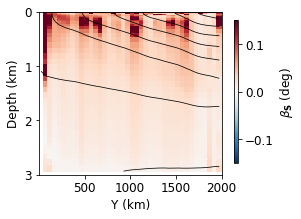

In [48]:
fig, ax = plt.subplots(1,1, figsize=(3.5,3.))

im = ax.pcolormesh(Ypcol/1e3, Z,beta_diff.where(T_coarse.hFacCcoarse==1.).sel(XCcoarse=0, method='nearest'), 
                vmin=-0.15, vmax=0.15, cmap='RdBu_r', rasterized=True)

ax.set_xlabel('Y (km)')
ax.set_ylabel('Depth (km)')

ax.contour(Ycoarse/1e3, Z,  T_coarse['T'].sel(XCcoarse=0, method='nearest'), colors='k', linewidths=0.75)

ax.set_xticks([500, 1000, 1500, 2000])
ax.set_yticks([-3000, -2000, -1000,0])
ax.set_yticklabels([3,2,1,0])

fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.18, 0.015, 0.66])
fig.colorbar(im, cax=cbar_ax)
cbar_ax.set_ylabel(r'$\beta_{\mathbf{S}}$ (deg)')

plt.savefig('fig7d.pdf', dpi=200,bbox_inches='tight')

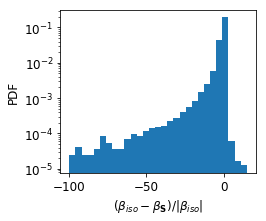

In [62]:
fig, ax = plt.subplots(1,1, figsize=(3.5,3.))

[_,_,_] = ((beta-beta_diff)/np.abs(beta)).where(T_coarse.hFacCcoarse==1.).plot.hist(
    bins=np.linspace(-100,15,30), density=True, rasterized=True)
#plt.xscale('log')
#plt.xlim([1, 50])
plt.yscale('log')
plt.xlabel(r'$(\beta_{iso} - \beta_{\mathbf{S}})/|\beta_{iso}|$')
plt.ylabel('PDF')
plt.title('')
#plt.title('Median: ' +str('%1.2f' %np.abs(diff_tensor.eigvalsST.isel(ii=2)/diff_tensor.eigvalsST.isel(ii=1)
#                                       ).where(T_coarse.hFacCcoarse==1.).median(['XCcoarse', 'YCcoarse','Z']).values))


plt.savefig('fig7e.pdf', dpi=200,bbox_inches='tight')

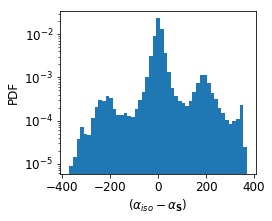

In [74]:
fig, ax = plt.subplots(1,1, figsize=(3.5,3.))

[_,_,_] = ((alpha-alpha_diff)).where(T_coarse.hFacCcoarse==1.).plot.hist(
    bins=np.linspace(-370,370,50), density=True, rasterized=True)
#plt.xscale('log')
#plt.xlim([1, 50])
plt.yscale('log')
plt.xlabel(r'$(\alpha_{iso} - \alpha_{\mathbf{S}})$')
plt.ylabel('PDF')
plt.title('')
#plt.title('Median: ' +str('%1.2f' %np.abs(diff_tensor.eigvalsST.isel(ii=2)/diff_tensor.eigvalsST.isel(ii=1)
#           ).where(T_coarse.hFacCcoarse==1.).median(['XCcoarse', 'YCcoarse','Z']).values))


plt.savefig('fig7f.pdf', dpi=200,bbox_inches='tight')

# Projection of normals
We can also look at the projection of $\mathbf{v}_{min}$ on $\nabla \rho$. This is a bit different from the estimation of the 2 angles, because it depends on only one angle, which is between these 2 vectors. 

# $ \mathbf{S} \nabla B . \nabla B $ ???

In [228]:
fluxT = xr.Dataset({'UpCp':T_coarse.UpTp, 'VpCp':T_coarse.VpTp, 'WpCp':T_coarse.WpTp})
gradT = xr.Dataset({'dCdx':T_coarse.T_X, 'dCdy':T_coarse.T_Y, 'dCdz':T_coarse.T_Z})

In [229]:
def flux_reconstruct(tensor, flux, grads):

    recUflux = -(tensor.sel(i=0, j=0)*grads.dCdx + tensor.sel(i=0, j=1)*grads.dCdy + tensor.sel(i=0, j=2)*grads.dCdz)
    recVflux = -(tensor.sel(i=1, j=0)*grads.dCdx + tensor.sel(i=1, j=1)*grads.dCdy + tensor.sel(i=1, j=2)*grads.dCdz)
    recWflux = -(tensor.sel(i=2, j=0)*grads.dCdx + tensor.sel(i=2, j=1)*grads.dCdy + tensor.sel(i=2, j=2)*grads.dCdz)

    errU = np.abs(flux.UpCp - recUflux)/np.abs(flux.UpCp)
    errV = np.abs(flux.VpCp - recVflux)/np.abs(flux.VpCp)
    errW = np.abs(flux.WpCp - recWflux)/np.abs(flux.WpCp)
    
    flux_rec=xr.Dataset({'UpCp':recUflux, 'VpCp':recVflux, 'WpCp':recWflux,
                                'errU':errU, 'errV':errV, 'errW':errW})
    
    return flux_rec

In [230]:
 = flux_reconstruct(diff_tensor.ST, fluxT, gradT)

In [233]:
Sgbgb = frb.UpCp*gradT.dCdx + frb.VpCp*gradT.dCdy + frb.WpCp*gradT.dCdz

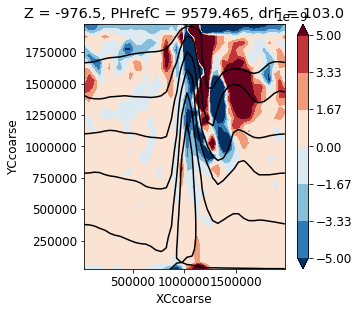

In [244]:
Sgbgb.sel(Z = -1000, method='nearest').plot.contourf(vmin=-5e-9)
plt.contour(Xcoarse, Ycoarse,  T_coarse['T'].sel(Z=-1500, method='nearest'), colors='k')

Text(0.5, 1.0, '$\\mathbf{S}\\nabla B . \\nabla B$')

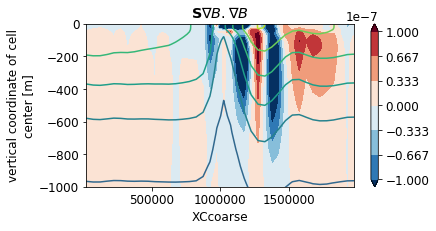

In [257]:
plt.figure(figsize=(6,3))
yloc=1000e3
Sgbgb.sel(YCcoarse = yloc, method='nearest').plot.contourf(vmin=-10e-8)
plt.contour(Xcoarse, Z, T_coarse['T'].sel(YCcoarse=yloc, method='nearest'))
plt.ylim([-1000, 0])
plt.title(r'$\mathbf{S}\nabla B . \nabla B$')

# What is $\nabla . (S \nabla B)$ 

In [259]:
frb

<xarray.Dataset>
Dimensions:      (XCcoarse: 40, YCcoarse: 40, Z: 40)
Coordinates:
  * Z            (Z) float32 -5.0 -15.0 -25.0 -36.0 ... -2727.5 -2830.5 -2933.5
  * YCcoarse     (YCcoarse) float32 25000.0 75000.0 ... 1925000.0 1975000.0
  * XCcoarse     (XCcoarse) float32 25000.0 75000.0 ... 1925000.0 1975000.0
    hFacCcoarse  (Z, YCcoarse, XCcoarse) float32 0.9 0.9 0.9 0.9 ... 1.0 1.0 1.0
    PHrefC       (Z) float32 49.05 147.15 245.25 ... 27767.205 28777.635
    drF          (Z) float32 10.0 10.0 10.0 12.0 ... 103.0 103.0 103.0 103.0
Data variables:
    UpCp         (Z, YCcoarse, XCcoarse) float32 -0.006504652 ... 0.0001231041
    VpCp         (Z, YCcoarse, XCcoarse) float32 0.00059156294 ... -3.4042117e-05
    WpCp         (Z, YCcoarse, XCcoarse) float32 -0.00027838693 ... -1.09890275e-08
    errU         (Z, YCcoarse, XCcoarse) float32 0.38298732 ... 0.60048616
    errV         (Z, YCcoarse, XCcoarse) float32 3.5783906 ... 0.009329055
    errW         (Z, YCcoarse, XCcoarse) fl

In [260]:
grid_ds = xr.Dataset()
grid_ds['TRAC01'] = Trac_coarse['TRAC01'] # use for Coarse grid
grid_ds['wVeltave'] = Model_Tav['wVeltave'] # needed for Z grid 
grid_ds = grid_ds.drop(['wVeltave','XC','YC']).isel(XC=0, YC=0)

In [263]:
# calculate gradients on coarse grid 
ds = generate_grid_ds(grid_ds, {'X': 'XCcoarse', 'Y':'YCcoarse'})
grid = Grid(ds, periodic='X')

In [268]:
gSgb = grid.interp(grid.diff(frb.UpCp, 'X'), 'X')/Lcoarse + \
       grid.interp(grid.diff(frb.VpCp, 'Y', boundary='extend'), 'Y', boundary='extend')/Lcoarse + \
       grid.interp(grid.diff(frb.WpCp, 'Z', boundary='extend'), 'Z', boundary='extend')/grid_ds.drF

In [93]:
gSgb.sel(Z = -30, method='nearest').plot()
plt.contour(Xcoarse, Ycoarse,  T_coarse['T'].sel(Z=-1500, method='nearest'), colors='k')

NameError: name 'gSgb' is not defined

Text(0.5, 1.0, '$-\\nabla .\\mathbf{S}\\nabla B $')

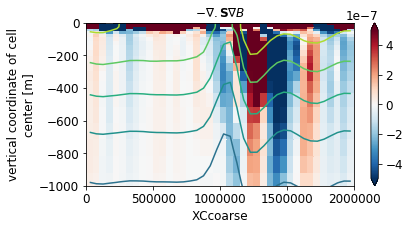

In [285]:
plt.figure(figsize=(6,3))
yloc=1500e3
gSgb.sel(YCcoarse = yloc, method='nearest').plot(vmin=-50e-8)
plt.contour(Xcoarse, Z, T_coarse['T'].sel(YCcoarse=yloc, method='nearest'))
plt.ylim([-1000, 0])
plt.title(r'$-\nabla .\mathbf{S}\nabla B $')